# <center> Web Cralwing - Dynamic Crawling <center>
---
## <div style="text-align: right"> E-비즈니스학과 서창덕 </div>

## 0. 라이브러리

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame
import time

## 1.  Selenium 기초

### 1.1. Simple Text Crawling
멜론 사이트에서 노래 제목을 크롤링해보자

URL: https://www.melon.com/chart/index.htm

In [3]:
DRIVER_PATH = r'C:\Users\lenovo\Desktop\Python\chromedriver.exe' # 경로 설정

In [4]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH) 
driver.implicitly_wait(10)  # implicity_wait = 브라우저에서 사용되는 엔진 자체에서 파싱되는 시간을 기다려 주는 메소드
                            # 즉, driver.implicitly_wait(10)은 요소가 존재할 때까지 최대 10 초 동안 대기


url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser') # html parsing

# title crawling
title = WebDriverWait(driver, 20) \
    .until(EC.presence_of_element_located((By.CSS_SELECTOR, "#frm > div > table > tbody > tr:nth-child(1) > td:nth-child(4) > div > div")))
# Implicitly wait = 정해진 시간만큼 충분히 기다리기
# Explicitly wait = 어떤 조건이 만족할 때까지 기다리기
# CSS_SELECTOR가 "#frm ~ div"인 element가 DOM(웹 페이지에 대한 인터페이스)에 존재하는지 확인될 때까지 기다리고, 그 element 리턴
# print("Title: {}".format(title.text))

title.text

'Dynamite\n방탄소년단'

css selector의 ```규칙```을 찾아본다

- 1번째 제목: #frm > div > table > tbody > tr:nth-child(**1**) > td:nth-child(4) > div > div
- 2번째 제목: #frm > div > table > tbody > tr:nth-child(**2**) > td:nth-child(4) > div > div<br>
. . .

- 100번째 제목: #frm > div > table > tbody > tr:nth-child(**100**) > td:nth-child(4) > div > div

또는 ```XPATH```로도 확인해보자 (```full Xpath```)

1번째 제목: //*[@id="frm"]/div/table/tbody/tr[**1**]/td[4]/div/div
2번째 제목: //*[@id="frm"]/div/table/tbody/tr[**2**]/td[4]/div/div
. . .

50번째 제목: //*[@id="frm"]/div/table/tbody/tr[**100**]/td[4]/div/div

In [5]:
# 2번째 제목 크롤링
WebDriverWait(driver, 20) \
    .until(EC.presence_of_element_located((By.XPATH, "//*[@id='frm']/div/table/tbody/tr[2]/td[4]/div/div"))).text

'취기를 빌려 (취향저격 그녀 X 산들)\n산들'

### 1.2. Text Crawling with for loop
위에서 찾은 Xpath의 규칙을 바탕으로 for loop 만들자

In [6]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
title_list = []

# title crawling (TOP 50)
for i in range(1, 51): # xpath로 접근, i = 1 ~50까지 top 50
    title = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.XPATH, f"//*[@id='frm']/div/table/tbody/tr[{i}]/td[4]/div/div")))
    title_list.append(title.text)
    
print(title_list)

['Dynamite\n방탄소년단', '취기를 빌려 (취향저격 그녀 X 산들)\n산들', '눈누난나 (NUNU NANA)\n제시 (Jessi)', '마리아 (Maria)\n화사 (Hwa Sa)', '다시 여기 바닷가\n싹쓰리 (유두래곤, 린다G, 비룡)', 'When We Disco (Duet with 선미)\n박진영', '오래된 노래\n스탠딩 에그', 'How You Like That\nBLACKPINK', '에잇(Prod.&Feat. SUGA of BTS)\n아이유', '내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)\n규현 (KYUHYUN)', '아로하\n조정석', 'Dolphin\n오마이걸 (OH MY GIRL)', 'Downtown Baby\n블루 (BLOO)', '어떻게 지내 (Prod. By VAN.C)\n오반', '홀로\n이하이', 'Summer Hate (Feat. 비)\n지코 (ZICO)', 'Blueming\n아이유', '덤디덤디 (DUMDi DUMDi)\n(여자)아이들', 'Dance Monkey\nTones And I', '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야\n장범준', 'Memories\nMaroon 5', '살짝 설렜어 (Nonstop)\n오마이걸 (OH MY GIRL)', 'METEOR\n창모 (CHANGMO)', 'Not Shy\nITZY (있지)', '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지\nAKMU (악동뮤지션)', '작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)\n방탄소년단', '사랑은 지날수록 더욱 선명하게 남아\n전상근', '사랑하게 될 줄 알았어\n전미도', '늦은 밤 너의 집 앞 골목길에서\n노을', 'Ice Cream (with Selena Gomez)\nBLACKPINK', '그 여름을 틀어줘\n싹쓰리 (유두래곤, 린다G, 비룡)', '거짓말이라도 해서 널 보고싶어\n백지영', '보라빛 밤 (pporappippam)\n선미', '모든 날, 모든 순간 (Every day

### 1.3. Text Crawling (Click & Back)
클릭하고 나오기 -> 동적 크롤링 가능 (```가사``` 크롤링 가능)

노래 제목에 링크가 걸려있기 때문에, 해당 링크까지의 **XPath**를 추가한다.

In [7]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 1번째 click하기
# tr[1]
click_element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="frm"]/div/table/tbody/tr[1]/td[3]/div/a')))
click_element.click()    

# back
driver.back()


# 2번째 click하기
# tr[2]
click_element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="frm"]/div/table/tbody/tr[2]/td[3]/div/a')))
click_element.click()    

# back
driver.back()

### 1.4. Text Crawling including contents
**1.2**처럼 for문과 함께 써보자! (첫 페이지 5개의 글에 대해 ```title```, ```artist```, ```heart```(하트 갯수), ```lyrics```(가사)를 크롤링

**1.3**에서 사용한 click & back을 활용하자

In [8]:
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
title_list = []
artist_list = []
heart_list = []
lyrics_list = []

# crawling (TOP 5)
for i in range(1, 6):
    # click
    click_element = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.XPATH, f'//*[@id="frm"]/div/table/tbody/tr[{i}]/td[3]/div/a')))
    click_element.click()

    # title crawling
    title = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#downloadfrm > div > div > div.entry > div.info > div.song_name")))
    title_list.append(title.text)

    # artist crawling
    artist = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#downloadfrm > div > div > div.entry > div.info > div.artist > a > span:nth-child(1)")))
    artist_list.append(artist.text)
    
    # heart crawling
    heart = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#d_like_count")))
    heart_list.append(heart.text)

    # lyrics crawling
    lyrics = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#d_video_summary")))
    lyrics_list.append(lyrics.text)
    
    # back
    driver.back()
    
print(title_list)
print(artist_list)
print(heart_list)
print(lyrics_list)

['Dynamite', '취기를 빌려 (취향저격 그녀 X 산들)', '눈누난나 (NUNU NANA)', '마리아 (Maria)', '다시 여기 바닷가']
['방탄소년단', '산들', '제시 (Jessi)', '화사 (Hwa Sa)', '싹쓰리 (유두래곤, 린다G, 비룡)']
['278,434', '103,191', '76,397', '140,023', '222,414']
["Cos ah ah\nI’m in the stars tonight\nSo watch me bring the fire\nand set the night alight\nShoes on get up in the morn\nCup of milk let’s rock and roll\nKing Kong kick the drum\nrolling on like a rolling stone\nSing song when I’m walking home\nJump up to the top LeBron\nDing dong call me on my phone\nIce tea and a game of ping pong\nThis is getting heavy\nCan you hear the bass boom\nI’m ready\nLife is sweet as honey\nYeah this beat cha ching\nlike money\nDisco overload I’m into\nthat I’m good to go\nI'm diamond you know I glow up\nHey so let’s go\nCos ah ah\nI’m in the stars tonight\nSo watch me bring the fire\nand set the night alight\nShining through the city\nwith a little funk and soul\nSo I’mma light it up\nlike dynamite woah\nBring a friend join the crowd\nWhoever wanna co

### TIP: 보통은 결과값을 ```데이터프레임``` 형태로 저장한다

In [9]:
# 결과 변수
raw_result = {'title': title_list,
              'artist': artist_list,
              'heart': heart_list,
          'lyrics': lyrics_list}

result = pd.DataFrame(raw_result)

# # csv 파일로 save
# result.to_csv("MelonTop5", mode='w')

# driver 종료
driver.quit()

In [10]:
result

,title,artist,heart,lyrics
0,Dynamite,방탄소년단,"278,434",Cos ah ah\nI’m in the stars tonight\nSo watch ...
1,취기를 빌려 (취향저격 그녀 X 산들),산들,"103,191",언제부턴가 불쑥\n내 습관이 돼버린 너\n혹시나 이런 맘이\n어쩌면 부담일까\n널 ...
2,눈누난나 (NUNU NANA),제시 (Jessi),"76,397",I’m trying to give u\nsomething more\nSo come ...
3,마리아 (Maria),화사 (Hwa Sa),"140,023",욕을 하도 먹어 체했어 하도\n서러워도 어쩌겠어 I do\n모두들 미워하느라 애썼네...
4,다시 여기 바닷가,"싹쓰리 (유두래곤, 린다G, 비룡)","222,414",예아 호우 예예예\n싹쓰리 인더 하우스\n커커커커커몬 싹 쓰리 투 렛츠고\n나 다시...


```데이터프레임``` 형식을 이용하면, 가독성도 좋고, 나중에 데이터 핸들링하기에도 편리

## 2. Image Crawling
이미지 크롤링하기

- 1번째 이미지: /html/body/div/div[3]/div/div/div[4]/form/div/table/tbody/tr[**1**]/td[4]/div/a/img
- 2번째 이미지: /html/body/div/div[3]/div/div/div[4]/form/div/table/tbody/tr[**2**]/td[4]/div/a/img<br>
...

- 50번째 이미지: /html/body/div/div[3]/div/div/div[4]/form/div/table/tbody/tr[**50**]/td[4]/div/a/img

### 2.1 URL Crawling

In [11]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
link_list = []

# # img crawling (TOP 50)

for i in range(1, 51): # tr:nth-child{i} -> i = 1 - 50
    
    img = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.CSS_SELECTOR, f"#frm > div > table > tbody > tr:nth-child({i}) > td:nth-child(2) > div > a > img")))

    link_list.append(img.get_attribute('src'))

print(link_list)

['https://cdnimg.melon.co.kr/cm2/album/images/104/79/150/10479150_20200918102847_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/63/600/10463600_20200720152905_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/69/416/10469416_20200730151034_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/52/351/10452351_20200629152036_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/62/799/10462799_20200717150822_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/75/061/10475061_20200812120927_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm/album/images/021/48/596/2148596_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/51/566/10451566_20200626114914_500.jpg/melon/resize/120/quality/80/optimize', 

### 2.2 Download images using URLs
자신의 디렉토리에 img 폴더 생성하고 실행

In [16]:
import urllib.request

count = 0
for link in link_list:
    count += 1
    urllib.request.urlretrieve(link, './img/img' + str(count) + '.jpg') #.jpg로 저장

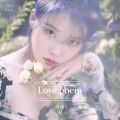

In [41]:
from IPython.display import Image, display

Image(filename = 'img/img17.jpg')
# 이미지 잘 받아진 것을 확인할 수 있음.